In [50]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [51]:
SAMPLING_RATE = 44100
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y



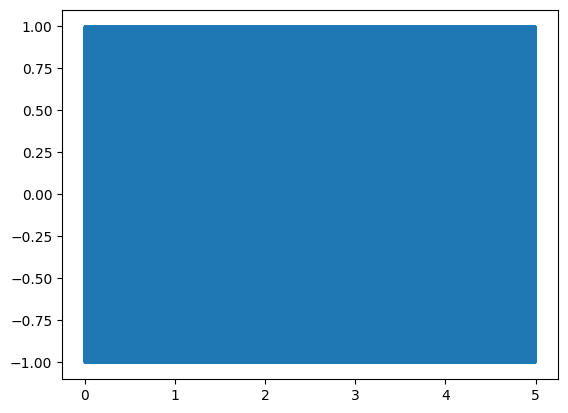

In [52]:
sin_xD, sin_yD = generate_sine_wave(1174.659, SAMPLING_RATE, 1)
sin_xE, sin_yE = generate_sine_wave(1318.51, SAMPLING_RATE, 1)
sin_xC6, sin_yC6 = generate_sine_wave(1046.502, SAMPLING_RATE, 1)
sin_xC5, sin_yC5 = generate_sine_wave(523.251, SAMPLING_RATE, 1)
sin_xG5, sin_yG5 = generate_sine_wave(783.99, SAMPLING_RATE, 1)


sin_x, sin_DONTUSE = generate_sine_wave(293, SAMPLING_RATE, 5)

mixed_signal = np.concatenate((sin_yD, sin_yE, sin_yC6, sin_yC5, sin_yG5))

plt.plot(sin_x, mixed_signal)
plt.show()

In [53]:
ipd.Audio(mixed_signal, rate=SAMPLING_RATE)

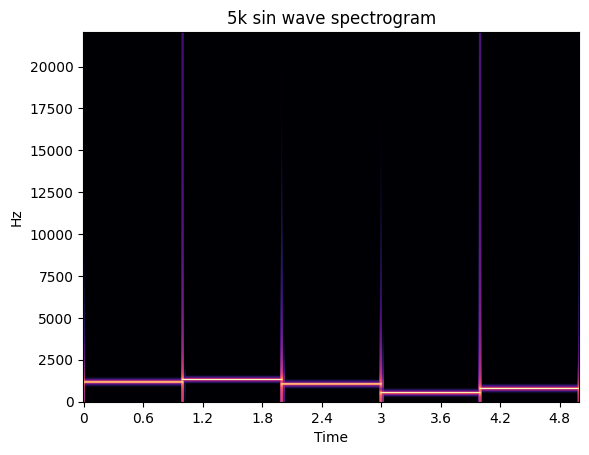

<Figure size 500x500 with 0 Axes>

In [54]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(mixed_signal)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='5k sin wave spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

In [55]:
def writeDelayWav(filename, left, right):
    # A 2D array where the left and right tones are contained in their respective rows
    
    #tone_y_stereo=np.vstack((toneLeft_y, toneRight_y))
    tone_y_stereo=np.vstack((left, right))
    
    # Reshape 2D array so that the left and right tones are contained in their respective columns
    tone_y_stereo=tone_y_stereo.transpose()
    
    # Produce an audio file that contains stereo sound
    wavfile.write(filename, srLazy, tone_y_stereo)

In [56]:
lazydogChirp, srLazy = librosa.load('team1003-speechchirp.wav')
print("recording shape", lazydogChirp.shape)
print("sampling rate", srLazy)
lazydog, srLazy = librosa.load('lazydog.wav')
print("recording shape", lazydog.shape)
print("sampling rate", srLazy)

writeDelayWav("team1003-stereospeechsine.wav", lazydog, lazydogChirp)

recording shape (110250,)
sampling rate 22050
recording shape (110250,)
sampling rate 22050


In [57]:
stereo, srLazy = librosa.load('team1003-stereospeechsine.wav')
ipd.Audio(stereo, rate=srLazy)



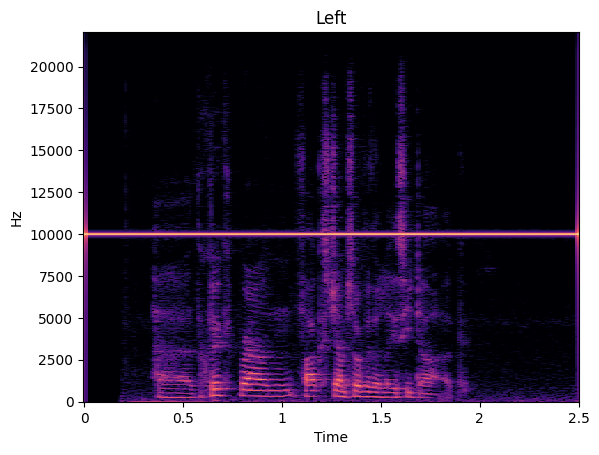

<Figure size 500x500 with 0 Axes>

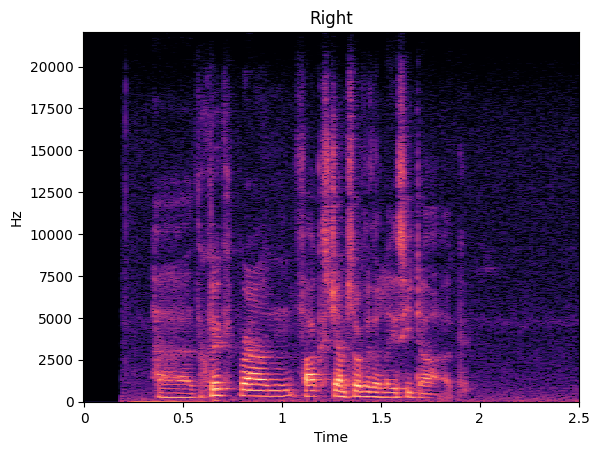

<Figure size 500x500 with 0 Axes>

In [58]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(lazydogChirp)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='Left')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(lazydog)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='Right')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))